In [4]:
using LinearAlgebra
using IntegerSmithNormalForm
using CSV
using DataFrames

In [5]:
function elementary(mu::Int, nu::Int)
    E = zeros(Int32, 4,4)
    E[mu,nu] = 1
    return E
end

elementary (generic function with 1 method)

In [6]:
function fluxes(a::Matrix)
    # input: in the form a[sl_from][direction]
    # Returns 16 plaquette valued things, notation
    # output phi[sl_from][direction]
    out = zeros(4,4)
    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (4,2,3), (2,4,1), (3,1,4), (1,3,2) ]))
        out[mu, 4] = a[i1, 3] - a[i2, 1] + a[i2, 2] - a[i3, 3] + a[i3, 1] - a[i1, 2]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,3,2), (3,1,4), (2,4,1), (4,2,3) ]))
        out[mu, 1] = a[i1, 2] - a[i2, 4] + a[i2, 3] - a[i3, 2] + a[i3, 4] - a[i1, 3]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,2,4), (3,4,2), (2,1,3), (4,3,1) ]))
        out[mu, 2] = a[i1, 3] - a[i2, 4] + a[i2, 1] - a[i3, 3] + a[i3, 4] - a[i1, 1]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,4,3), (3,2,1), (2,3,4), (4,1,2) ]))
        out[mu, 3] = a[i1, 1] - a[i2, 4] + a[i2, 2] - a[i3, 1] + a[i3, 4] - a[i1, 2]
    end

    return out
end
    
    

fluxes (generic function with 1 method)

In [7]:
# the pi/2 ansatz
e = 0.1
a_πflux = [
    0 0 π -π; # sl 1
    0 0 0 0; # sl 2
    0 0 π π; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_πflux) ))/π  

4×4 Matrix{Float64}:
 -1.0   1.0   1.0  -1.0
  1.0   1.0  -1.0  -1.0
 -1.0   1.0  -1.0   1.0
  1.0  -1.0   1.0   1.0

In [8]:
# the pi/2 ansatz
e = 0.1
a_π2flux = [
    0 0 π/2 -π/2; # sl 1
    0 π 0 0; # sl 2
    0 0 π/2 π/2; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_π2flux) ))/π  

4×4 Matrix{Float64}:
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5

In [9]:
a_ππ00_12 = [
    0 0 0 π; # sl 1
    0 0 0 π; # sl 2
    0 0 0 0; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_12) ))/π  

4×4 Matrix{Float64}:
  1.0  -1.0  0.0  0.0
 -1.0   1.0  0.0  0.0
  1.0  -1.0  0.0  0.0
 -1.0   1.0  0.0  0.0

In [10]:
a_ππ00_13 = [
    0 0 0 π; # sl 1
    0 0 0 0; # sl 2
    0 0 0 π; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_13) ))/π  

4×4 Matrix{Float64}:
 -1.0  0.0   1.0  0.0
 -1.0  0.0   1.0  0.0
  1.0  0.0  -1.0  0.0
  1.0  0.0  -1.0  0.0

In [8]:
a_ππ00_14 = [
    0 0 0 π; # sl 1
    0 0 0 0; # sl 2
    0 0 0 0; # sl 3
    0 0 0 π  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_14) ))/π  

4×4 Matrix{Float64}:
 0.0   1.0  -1.0  0.0
 0.0  -1.0   1.0  0.0
 0.0  -1.0   1.0  0.0
 0.0   1.0  -1.0  0.0

In [11]:
fluxpat(a) = angle.(exp.(1im*fluxes(a)))
e = 0.1

fluxpat([
    0 0 e 2π-e; # sl 1
    0 0 -e 0; # sl 2
    0 0 0 0; # sl 3
    0 0 0 2π-e  # sl 4 (0)
])

4×4 Matrix{Float64}:
 -0.1  -2.44929e-16   0.1   0.0
  0.1   0.2          -0.1  -0.2
  0.1   2.44929e-16  -0.1   0.0
 -0.1  -0.2           0.1   0.2

In [12]:
from_numerics = CSV.read("gaugefiles/0_flux%003.gauge", 
    DataFrame,delim=' ',ignorerepeated=true)

fluxpat(collect(transpose(reshape(from_numerics[!,5],4,4))))

4×4 Matrix{Float64}:
 -8.70397e-8   4.66234e-7  -2.7783e-7   -1.01364e-7
  1.11714e-7   3.6623e-8    2.53155e-7  -4.01493e-7
  5.8312e-7   -9.62314e-7   6.72535e-7  -2.93341e-7
 -6.07794e-7   4.59457e-7  -6.47861e-7   7.96198e-7

In [13]:
M = zeros(Int32, 16,16);
for mu=1:4
    for nu=1:4
        # mu -> row; = 
        M[:, nu + 4*(mu-1)] = vec(fluxes(elementary(mu, nu)))
    end
end

M

16×16 Matrix{Int32}:
  0   1  -1   0   0  -1   0   1   0   0   1  -1   0   0   0   0
  0   0   1  -1   0   0   0   0   0   1  -1   0   0  -1   0   1
  0  -1   0   1   0   1  -1   0   0   0   0   0   0   0   1  -1
  0   0   0   0   0   0   1  -1   0  -1   0   1   0   1  -1   0
 -1   0   1   0   1   0   0  -1   0   0   0   0   0   0  -1   1
  0   0   0   0   0   0  -1   1  -1   0   1   0   1   0   0  -1
  1   0   0  -1  -1   0   1   0   0   0  -1   1   0   0   0   0
  0   0  -1   1   0   0   0   0   1   0   0  -1  -1   0   1   0
  1  -1   0   0   0   0   0   0  -1   0   0   1   0   1   0  -1
 -1   0   0   1   0   1   0  -1   1  -1   0   0   0   0   0   0
  0   0   0   0   1  -1   0   0   0   1   0  -1  -1   0   0   1
  0   1   0  -1  -1   0   0   1   0   0   0   0   1  -1   0   0
  0   0   0   0  -1   1   0   0   1   0  -1   0   0  -1   1   0
  1   0  -1   0   0  -1   1   0   0   0   0   0  -1   1   0   0
 -1   1   0   0   0   0   0   0   0  -1   1   0   1   0  -1   0
  0  -1   1   0   1

In [181]:
rank(M)

6

In [184]:
R,S,B = snf(M)

(Int32[0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 1 0; -1 -1 … 0 1], Int32[1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Int32[1 0 … -1 -1; 0 1 … 0 -1; … ; 0 0 … 1 0; 0 0 … 0 1])

In [214]:
function uniform( phi )
    # returns the matrix of uniform-flux states
    # phi in the form [phi1, phi2, phi3]
    F = zeros(Int32, 4,4)
    for mu =1:4
        F[mu, :] .= phi'
    end
    return vec(F)
end

uniform (generic function with 1 method)

In [277]:
Phi = mapreduce(permutedims, vcat, [
    uniform([1 1 -1 -1]),
    uniform([1 -1 1 -1]),
    uniform([1 -1 -1 1])
    ])

3×16 Matrix{Int32}:
 1  1  1  1   1   1   1   1  -1  -1  -1  -1  -1  -1  -1  -1
 1  1  1  1  -1  -1  -1  -1   1   1   1   1  -1  -1  -1  -1
 1  1  1  1  -1  -1  -1  -1  -1  -1  -1  -1   1   1   1   1

In [295]:
@assert S*S == S
X= (S*R*Phi')[:,2] + (S*R*Phi')[:,1];
a_test = B*X
fluxes(reshape(a_test,4,4))

4×4 Matrix{Float64}:
  2.0   0.0   0.0  -2.0
  0.0  -2.0  -2.0   4.0
 -8.0   6.0  -2.0   4.0
  6.0  -4.0   4.0  -6.0

In [299]:
R

16×16 Matrix{Int32}:
  0   0   0  0  -1   0  0  0   0  0  0  0  0  0  0  0
  0   0  -1  0   0   0  0  0   0  0  0  0  0  0  0  0
  0   1   0  0   0   0  0  0   0  0  0  0  0  0  0  0
  0  -1  -1  0   1   0  0  0   1  0  0  0  0  0  0  0
 -1  -1  -1  0   0   0  0  0   0  0  0  0  0  0  0  0
  1   1   1  0   0  -1  0  0   0  0  0  0  0  0  0  0
  1   0   1  0   1   0  1  0   0  0  0  0  0  0  0  0
 -1   0  -1  0   0   1  0  1   0  0  0  0  0  0  0  0
  1   1   1  1   0   0  0  0   0  0  0  0  0  0  0  0
  1   1   0  0   0   0  0  0   1  1  0  0  0  0  0  0
 -2  -1  -1  0  -1   1  0  0  -1  0  1  0  0  0  0  0
  1   0   1  0   1  -1  0  0   1  0  0  1  0  0  0  0
  1   0   0  0   1   0  0  0   1  0  0  0  1  0  0  0
 -1   0   0  0   0   1  0  0  -1  0  0  0  0  1  0  0
  1   1   1  0   0  -1  0  0   1  0  0  0  0  0  1  0
 -1  -1  -1  0  -1   0  0  0  -1  0  0  0  0  0  0  1

# Reverse engineering the fluxes

Problem: within finite unit cell, can only have fluxes be integer multiple of $\frac{\pi}{2}L^2$. Not obvious how to fine J, B such that fluxes agree.


In [45]:
using Optim

function best_flux_fast(gvec::Vector{Float64})
    best_fun = sum(abs.(gvec))+1
    res = Nothing

    
    function energy_der!(storage, x)
        storage[1] = -gvec[1]*sin(x[1]) + gvec[4]*sin(-x[1]-x[2]-x[3])
        storage[2] = -gvec[2]*sin(x[2]) + gvec[4]*sin(-x[1]-x[2]-x[3])
        storage[3] = -gvec[3]*sin(x[3]) + gvec[4]*sin(-x[1]-x[2]-x[3])
    end

    
    energy_cost(x) = dot(gvec[1:3],cos.(x[1:3])) + gvec[4]*cos(-x[1]-x[2]-x[3])

    guesses = [
        [0. 0. 0.],
        [π/2 π/2 π/2],
        [π/2 -π/2 π/2],
        [-π/2 -π/2 π/2],
        [-π/2 -π/2 -π/2],
        [π π π]
        ]

    lower = [-π -π -π]
    upper = [π π π]
    
    minim = Inf
    r = nothing
    for guess in guesses
        od = OnceDifferentiable(energy_cost, energy_der!, guess)
        res = optimize(od, lower, upper, guess, Fminbox(GradientDescent()) )
        if res.minimum < minim
            r = res
            minim = res.minimum
        end
    end
    return r
end

best_flux_fast (generic function with 2 methods)

In [276]:
using Plots
g0 = range(0,5,100)

flux_vals = reduce(hcat, (x -> best_flux_fast([-1., -1., -1.,x]).minimizer' ).(g0))



3×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  3.73739e-8  …  0.990032  0.9906  0.991157
 0.0  0.0  0.0  0.0  0.0  0.0  3.65535e-8     0.990032  0.9906  0.991157
 0.0  0.0  0.0  0.0  0.0  0.0  3.73739e-8     0.990032  0.9906  0.991157

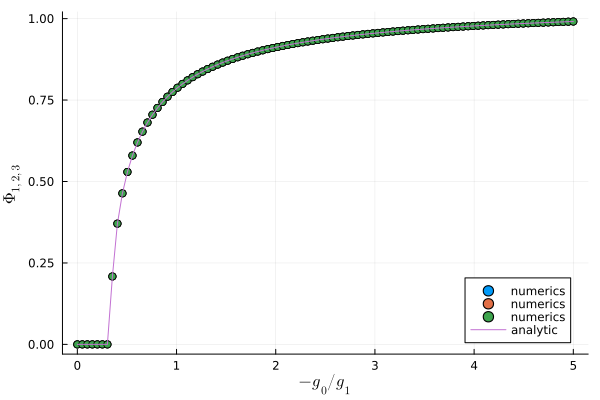

In [279]:
using LaTeXStrings
plot(g0, abs.(flux_vals'),label="numerics",seriestype=:scatter)

function f(x)
    # x = g0/gj
    try 
        return 3π/2 - 1.5*acos(0.5 - 0.5/x) 
    catch 
        return 0
    end
end



function finv(Φ0)
    return ( 1 - 2*cos((3π/2 - Φ0)*2/3) )^-1
end


plot!(g0, 1/3 .*f.(g0),label="analytic")

xlabel!(L"-g_0/g_1")
ylabel!(L"\Phi_{1,2,3}")


# title!("Some Plots")
# xlabel!("x label")
# ylabel!("y label")

We simply want to get this for a representative case. A simple one is $\Phi = (7π/8, 3π/8,3π/8,3π/8)$ 
Can get the first analytically - in the 111 axis,
$$
\Phi_0 = \frac{3\pi}{2} - \frac{3}{2} \operatorname{arccos}\left[ \frac{1}{2} + \frac{g_1}{2g_0} \right] 
$$
Realises the first case for $g_1/g_0 = 1-\sqrt{3}$.

Second case: $(1, 1/\sqrt{2}, 1,-1)$

36

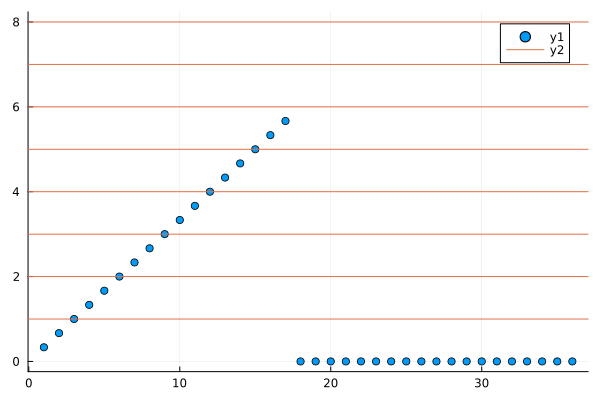

In [190]:
L = 3
Φelem = 2*π / (4 * L^2)

print((4 * L^2))

calc_fl = N -> abs( best_flux_fast([-1, -1, -1, finv( N *Φelem)]).minimizer[1] / Φelem )
plot(1:36, calc_fl.(collect(1:36)), seriestype=:scatter)
hline!(1:8)

In [169]:

best_flux_fast([-1, -1, -1, finv( 12 *Φelem)]).minimizer/π

1×3 Matrix{Float64}:
 -0.222222  -0.222222  -0.222222

In [197]:
using LinearAlgebra
include("PyrochloreGeometry.jl")
import .PyrochloreGeometry as geom


In [198]:
function g_from_params(Jpm,B)
    return [3/2 *Jpm^3 + 5/4 * Jpm^2  * (B' * geom.pyro[mu]/√3)^2 for mu=1:4]
end

g_from_params (generic function with 1 method)

In [202]:
g_from_params(-0.015, [1,1,1].*0.2/√3)

4-element Vector{Float64}:
  6.187500000000001e-6
 -3.812499999999999e-6
 -3.812499999999999e-6
 -3.812499999999999e-6

A given g-state is uniquely specified by the ratio

$$ J_{\pm}/B^2 := a $$

In the 111 direction, $a = 5\frac{x/9 - 1}{1-x}$, where $x = g_0/g_1$.


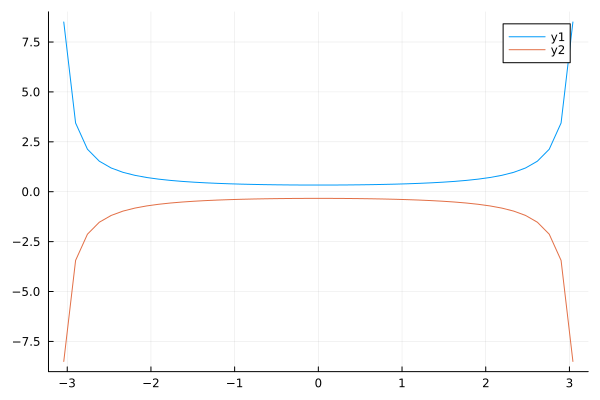

In [423]:
x = Φ0 -> ( 1 - 2*cos((3π/2 - Φ0)*2/3) )^-1;
x2 = Φ0 -> (1-4*cos(Φ0/3)^2)^-1
phi = range(-π+0.1,π-0.1,44)

plot()
plot!(phi, x.(phi))
plot!(phi, x2.(phi))
# ylims!(-20,20)

In [430]:
"""
FF_111_B(desired_Φ, Jpm)
-> B

x = g0/g1 <0


Returns the (111) field needed to realise the prescribed field
"""
function FF_111_B(desired_Φ0, Jpm)
    # x = Φ0 -> ( 1 - 2*cos((π/2 - Φ0)*2/3) )^-1;
    
    xp = (1-4*cos(desired_Φ0/3)^2)^-1
    # a = xp->  5*(xp/9 -1) / ;
    B = sqrt(Jpm* 6*(1-xp)/ (xp*5/9 - 5) )
    return B
end

    

FF_111_B

In [457]:
Jpm = -0.15
Φ0 = π - 3π/36
B = FF_111_B(Φ0, Jpm)
g = g_from_params(Jpm, B*[1,1,1]/√3)
println(g)
println([Φ0./π, -Φ0./3π])
best_flux_fast( g).minimizer

[0.01053689398167694, -0.003329234002035896, -0.003329234002035896, -0.003329234002035896]
[0.9166666666666666, -0.3055555555555555]


1×3 Matrix{Float64}:
 2.87979  -0.95993  -0.95993

In [450]:
# Correctness check
for n in 1:100
    Jpm = -rand()
    Φ0 = π*( 1 - 0.3*rand() )
    B = FF_111_B(Φ0, Jpm)
    g = g_from_params(Jpm, B*[1,1,1]/√3)
    phi = abs.(best_flux_fast(g).minimizer)
    if abs(phi[1]-Φ0) > 1e-3
        println( "$(Jpm)\t $(Φ0)\t$(phi[1])\t$(abs(phi[1]-Φ0))" )
    end
end

# more or less works

-0.01928448546004269	 2.2959374783133795	3.141592652649826	0.8456551743364464
-0.013748495130968652	 2.4340926120283903	2.432178685387746	0.00191392664064427
-0.8194318337701567	 2.3792540015708954	3.14159265266851	0.7623386510976147
-0.16697140454249293	 2.324680498600713	3.141592652701005	0.8169121541002919
-0.8089440863584048	 2.4015719779306206	3.141592652653696	0.7400206747230755


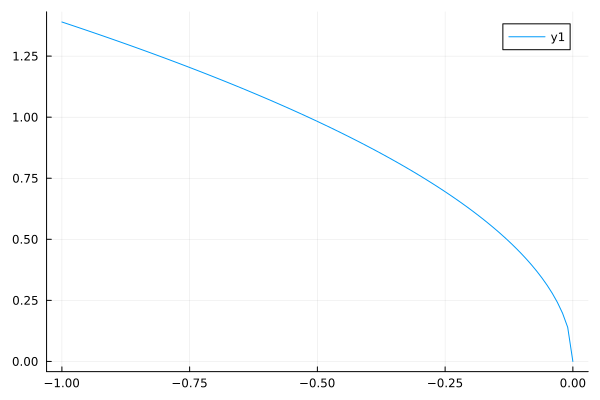

In [451]:
Jpm_vals = range(-1,0,100)

plot(Jpm_vals, FF_111_B.(2π/3, Jpm_vals))

In [379]:
# best_flux_fast(g_from_params(Jpm, 0.53825*[1,1,1]/√3)).minimizer/π
g_from_params(Jpm, 0.53825*[1,1,1]/√3)

4-element Vector{Float64}:
  0.003085679882812502
 -0.0041571466796874994
 -0.0041571466796874994
 -0.0041571466796874994

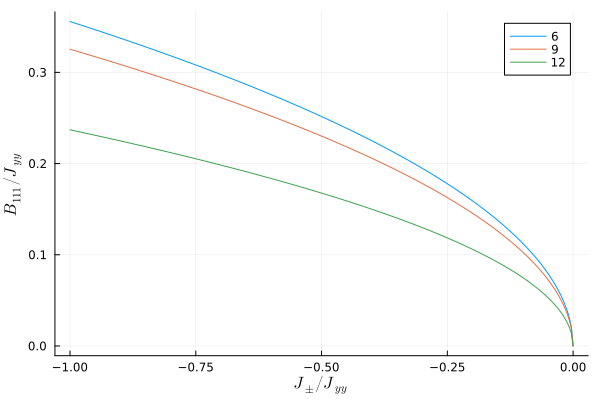

In [235]:
using Plots
using LaTeXStrings
jpp = range(-1,0,300)

plot(jpp, FF_111_B.(6 * Φelem, jpp), label="6")
plot!(jpp, FF_111_B.(9 * Φelem, jpp), label="9")
plot!(jpp, FF_111_B.(12 * Φelem, jpp), label="12")
ylabel!(L"B_{111}/J_{yy}")
xlabel!(L"J_{\pm}/J_{yy}")

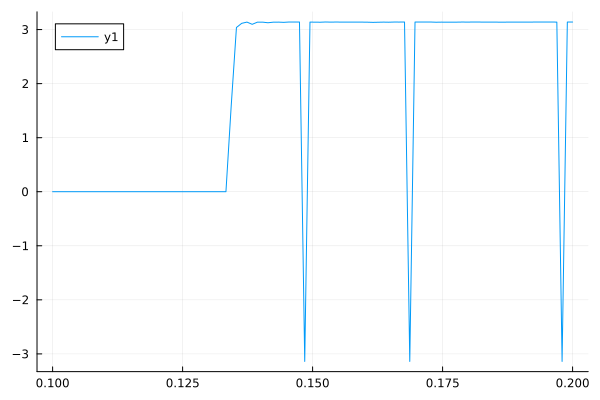

In [489]:
bb = range(0.1,0.2,100)
y = [best_flux_fast(g_from_params(-0.01, b*[1,1,0]/√2)).minimizer[1] for b in bb ]
plot(bb,y)